<a href="https://colab.research.google.com/github/huliyao1115/Hello-world/blob/main/Optimisation%20Parameters%20without%205-fold%20CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 7.8 MB/s eta 0:00:00


In [3]:
!pip install scikit-learn

In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [5]:
df = pd.read_csv('Wrong_SMILES_Delete.csv')

In [6]:
df.drop(['SMILE_Organic_linker_1','Molar_Volume_cm3_mol','Resistivity_Ω_cm','Mohs_Hardness','Specific_Heat_Capacity_J_(g·K)-1','Ionization_Potential_eV','Electrical_Conductivity_MS_m','Thermal_Conductivity_W_m·K','Rayon_Atomique_pm','Electron_Affinity_eV','Boiling_Point_℃','Melting_Point_℃','Atomic_Number','METAL','Atomic_Number','1s', '2s', '2p', '3s', '3p', '3d', '4s', '4p', '4d', '4f', '5s', '5p'], axis=1, errors='ignore', inplace=True)

In [7]:
# Split the data into training and test sets
X = df.drop(['CO2 Uptake'], axis=1).values
y = df['CO2 Uptake'].values

In [8]:
# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
# Convert to panda dataframe with specified column names
column_names = ['Surface_Area', 'Pore_Volume', 'Pressure', 'Temperature', 'Molar_Mass_g_mol', 'Electronegativity_Pauling', 'Density_g_cm3']
X_scaled = pd.DataFrame(X_scaled, columns=column_names)

In [14]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)



In [15]:
# Further split the data into two sets
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)


In [16]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_sub)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

In [17]:
# Hyperparameter tuning
best_fit_intercept = None
best_r2 = -np.inf

In [19]:
for fit_intercept in [True, False]:
    lm = LinearRegression(fit_intercept=fit_intercept)
    lm.fit(X_train_poly, y_train_sub)
    y_val_pred = lm.predict(X_val_poly)
    r2_val = r2_score(y_val, y_val_pred)

    if r2_val > best_r2:
        best_r2 = r2_val
        best_fit_intercept = fit_intercept

In [20]:
# Use the most optimized parameters to train
lm = LinearRegression(fit_intercept=best_fit_intercept)
X_train_poly = poly.fit_transform(X_train)
lm.fit(X_train_poly, y_train)

LinearRegression()

In [21]:
# Make predictions on the test set
y_pred = lm.predict(X_test_poly)

In [22]:
# Evaluate the model's performance
r2 = r2_score(y_test, y_test)
MSE = mean_squared_error(y_test, y_test)
MAE = mean_absolute_error(y_test, y_test)

print("r2_score:", r2)
print("mean_absolute_error:", MAE)
print("mean_squared_error:", MSE)

r2_score: 1.0
mean_absolute_error: 0.0
mean_squared_error: 0.0


In [25]:
print(f'Best fit_intercept: {best_fit_intercept}')
print(f'R^2: {r2}')
print(f'Mean Squared Error: {MAE}')
print(f'Mean Absolute Error: {MAE}')



Best fit_intercept: True
R^2: 1.0
Mean Squared Error: 0.0
Mean Absolute Error: 0.0


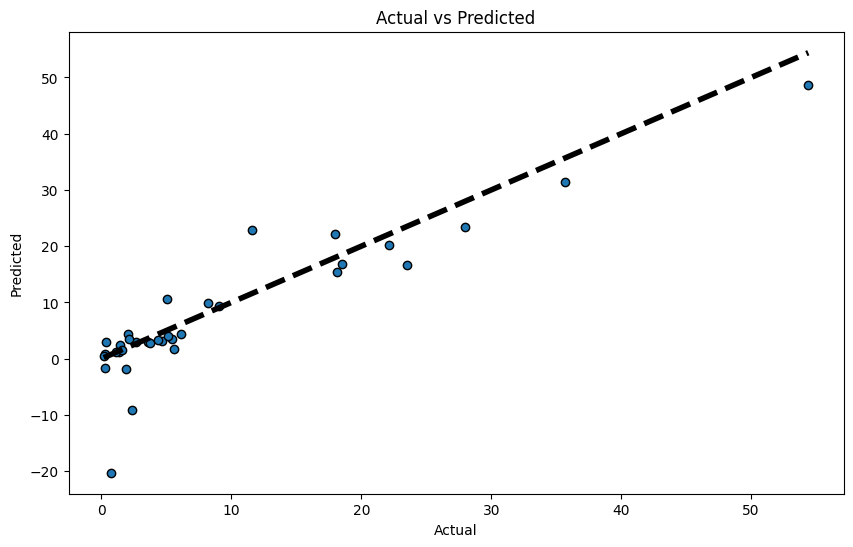

In [26]:
# Visualize the results
# scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()



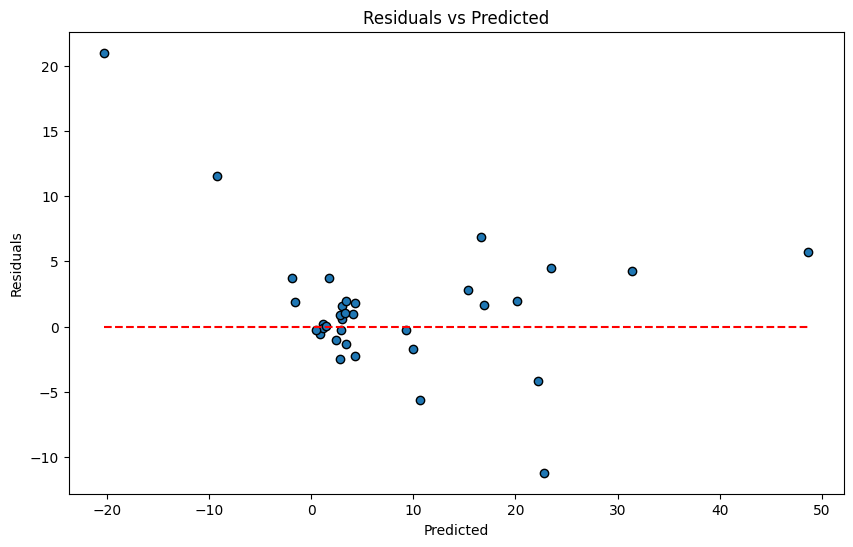

In [28]:
# Residual plots
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, edgecolors=(0, 0, 0))
plt.hlines(0, y_pred.min(), y_pred.max(), colors='r', linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()


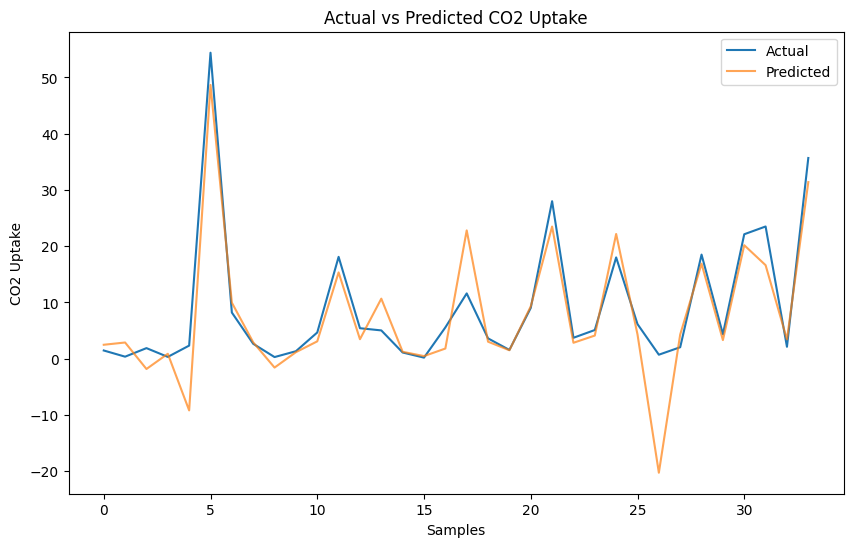

In [29]:
# Prediction plots
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.xlabel('Samples')
plt.ylabel('CO2 Uptake')
plt.title('Actual vs Predicted CO2 Uptake')
plt.legend()
plt.show()